MNIST HANDWRITEN Classification using deep learning


In [3]:
# importing libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix


loading the mnist dataset from keras

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [5]:
type(x_train)

numpy.ndarray

In [7]:
#shaping the numpy arrays
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [8]:
#c hecking the data sets and printing the image
print(x_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [9]:
print(x_train[10].shape)

(28, 28)


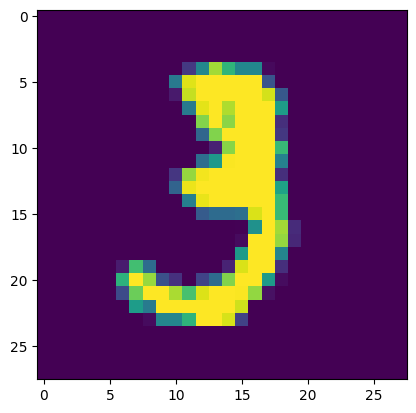

In [10]:
plt.imshow(x_train[10])
plt.show()

IMAGES LABELS

In [14]:
print(y_train.shape,y_test.shape)

(60000,) (10000,)


In [15]:
#uniquily values in y_train
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [16]:
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]


Applying one hot encoding

In [17]:
#scaling the values

x_train =x_train/255
x_test = x_test/255

In [18]:
print(x_train[20])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

NOW SIMPLE BUILDING THE NEURAL NETWORK FOR THE CLASSIFICATION

In [19]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
# training the neural network based on the trainin data
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8556 - loss: 0.5101
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9559 - loss: 0.1508
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9667 - loss: 0.1102
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9743 - loss: 0.0856
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9788 - loss: 0.0700
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9825 - loss: 0.0581
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9850 - loss: 0.0487
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9876 - loss: 0.0415
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9879 - loss: 0.0360
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9896 - loss: 0.0321


training data accuracy =98.9%

now checking in test data

In [24]:
loss,accuracy=model.evaluate(x_test,y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9631 - loss: 0.1331
0.9668999910354614


so the test accuracy is==96%

In [25]:
print(x_test.shape)

(10000, 28, 28)


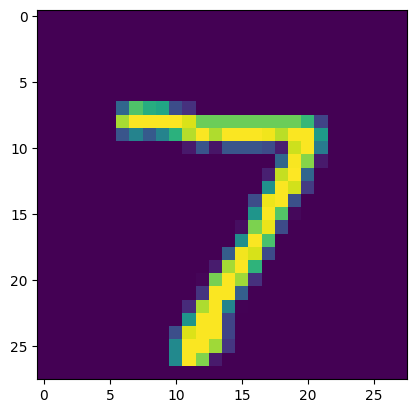

In [26]:
#first datapont on the x
plt.imshow(x_test[0])
plt.show()

In [27]:
print(y_test[0])

7


In [28]:
y_pred=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [29]:
print(y_pred.shape)

(10000, 10)


In [30]:
print(y_pred[0])

[3.7160944e-04 6.3170568e-04 1.7085105e-01 9.9090922e-01 2.9567282e-08
 3.5315063e-02 1.9804932e-11 9.9999940e-01 8.0394214e-03 6.4386988e-01]


In [31]:
#converting the prediction probabilities to class label

label_for_first_test_image=np.argmax(y_pred[0])
print(label_for_first_test_image)

7


In [32]:
#converting th prediction to class labels to the all dtasets

y_pred_labels=[np.argmax(i) for i in y_pred]
print(y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(8), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(3), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

ytest = true labels
y pred label =predicted labels
  now using confusion ,matrix

In [33]:
conf_mat=confusion_matrix(y_test,y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 935    0    0    2    3    3    8    4    2   23]
 [   0 1115    0    4    0    1    4    2    8    1]
 [   4    2  978   10    4    1    5   12   13    3]
 [   0    0    1  982    0    9    0    8    4    6]
 [   0    0    4    0  958    0    6    3    0   11]
 [   1    0    0   23    1  851    7    2    4    3]
 [   3    3    1    0    5   11  933    1    1    0]
 [   0    0    5    4    1    0    0 1007    1   10]
 [   0    0    1   12    7    7    5    3  930    9]
 [   1    3    0    2   14    4    0    5    0  980]], shape=(10, 10), dtype=int32)


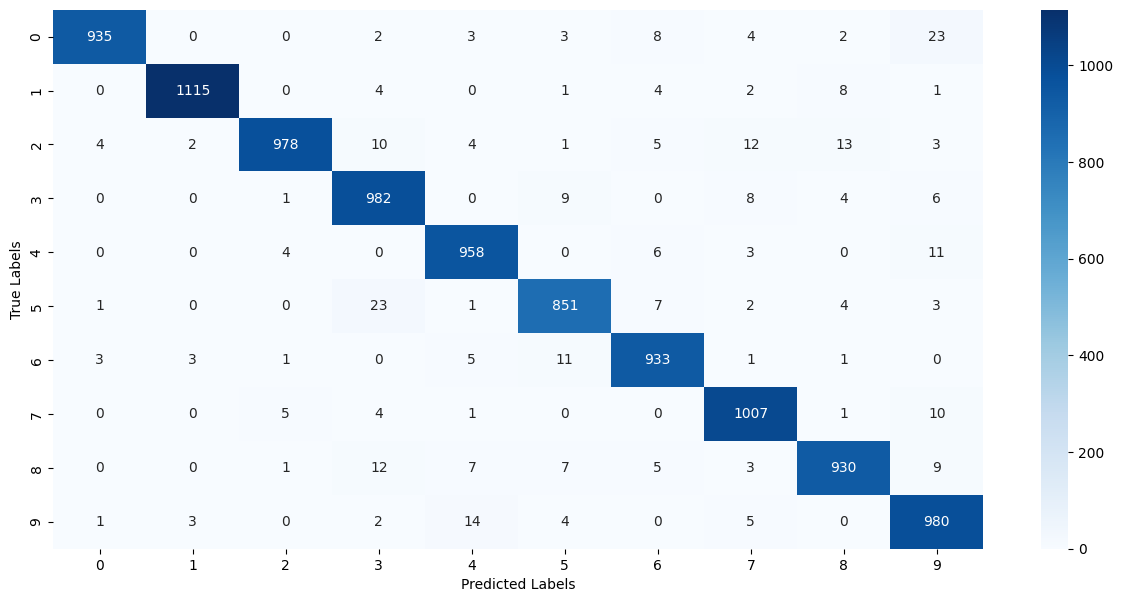

In [34]:
#plotting in the heat map

plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

Now building the predictive system

In [39]:
input_image_path='/content/MNIST_digit.png'
input_image=cv2.imread(input_image_path)

In [40]:
type( input_image)

numpy.ndarray

In [41]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


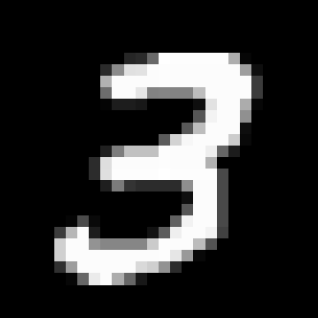

In [42]:
cv2_imshow(input_image)

In [43]:

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [44]:

grayscale.shape

(318, 318)

In [46]:
input_image_resize = cv2.resize(grayscale, (28, 28))

In [47]:

cv2_imshow(input_image_resize)

In [48]:

input_image_resize = input_image_resize/255

In [49]:
type(input_image_resize)

numpy.ndarray

In [50]:
image_reshaped= np.reshape(input_image_resize,[1,28,28])

In [52]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step
[[1.2019965e-09 2.4546636e-04 1.5112789e-02 1.0000000e+00 4.2223527e-13
  9.9992633e-01 6.9150787e-15 2.4094868e-04 7.1025491e-01 9.6519017e-01]]


In [53]:
input_pre_label = np.argmax(input_prediction)

In [54]:
print(input_pre_label)

3


Predictive System

Path of the image: /content/MNIST_digit.png


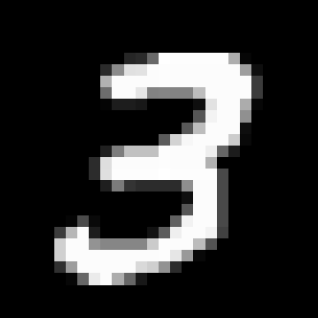

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
the handwriteen digit is recognized as  3


In [55]:
input_image_path = input('Path of the image: ')
input_image = cv2.imread(input_image_path)
cv2_imshow(input_image)
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)
input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize/255
image_reshaped = np.reshape(input_image_resize, [1, 28, 28])
input_prediction = model.predict(image_reshaped)
input_pre_label = np.argmax(input_prediction)
print('the handwriteen digit is recognized as ', input_pre_label)
